# *X-RAY BODY PART PREDICTION ✨*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, InputLayer
import cv2
from sklearn.preprocessing import StandardScaler

# *DATA CLEANING + PREPROCESSING*

In [3]:
train_data = pd.read_csv('../input/xraydataset/train_df.csv')
test_data = pd.read_csv('../input/xraydataset/test_df.csv')

In [4]:
train_data['Target'] = train_data['Target'].apply(lambda x: x.strip())

In [5]:
train_data.head(3)

,SOPInstanceUID,Target,MultiImageType,ImageType,ImageType1,InstanceCreationDate,InstanceCreationTime,SOPClassUID,StudyDate,SeriesDate,...,WindowWidth,ImageType2,KVP,DistanceSourceToDetector,DistanceSourceToPatient,ExposureTime,XRayTubeCurrent,AcquisitionNumber,ImageType3,image_path
0,1.2.826.0.1.3680043.8.498.10025629581362719970...,0,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10025...
1,1.2.826.0.1.3680043.8.498.10036150326276641158...,15,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10036...
2,1.2.826.0.1.3680043.8.498.10038426859954986240...,12,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10038...


***Checking both Original Image and Normalize Image***

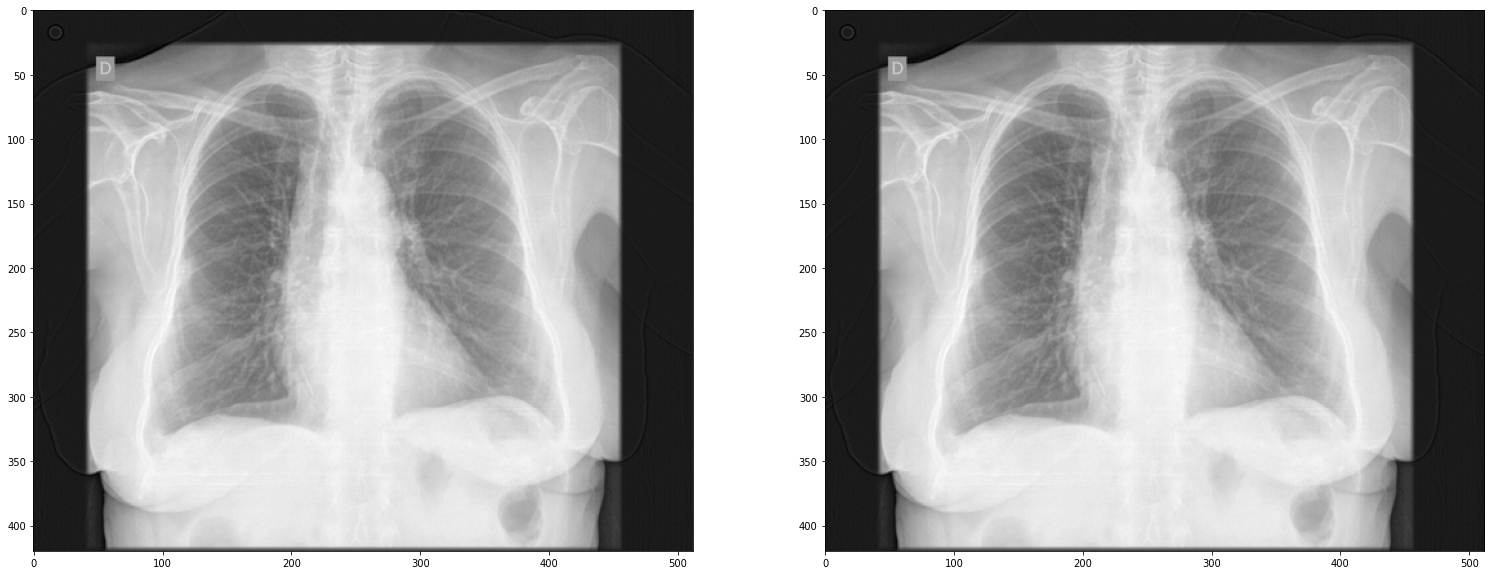

In [6]:
plt.figure(figsize=(26,28))
img = plt.imread('../input/xraydataset/image_png.png')
norm_img = cv2.normalize(img,None,alpha=0,beta=500,norm_type=cv2.NORM_MINMAX)
plt.subplot(2,2,1)
plt.imshow(norm_img,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(img,cmap='gray')

In [7]:
train_dff = pd.DataFrame()
train_dff['SOPInstanceUID'] = train_data['SOPInstanceUID']
train_dff['Target'] = train_data['Target']

In [121]:
train_dff.head(2)

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.10025629581362719970...,0
1,1.2.826.0.1.3680043.8.498.10036150326276641158...,15


***We will do One-Hot Encoding for every label like if the label have Abdomen then Abdomen will only be 1 and others will be zero***

In [8]:
def Names(label):
    if label == '0':
        return 'Abdomen'
    elif label == '1':
        return 'Ankle'
    elif label == '2':
        return 'Cervical Spine'
    elif label == '3':
        return 'Chest'
    elif label == '4':
        return 'Clavicles'
    elif label == '5':
        return 'Elbow'
    elif label == '6':
        return 'Feet'
    elif label == '7':
        return 'Finger'
    elif label == '8':
        return 'Forearm'
    elif label == '9':
        return 'Hand'
    elif label == '10':
        return 'Hip'
    elif label == '11':
        return 'Knee'
    elif label == '12':
        return 'Lower Leg'
    elif label == '13':
        return 'Lumbar Spine'
    elif label == '14':
        return 'Others'
    elif label == '15':
        return 'Pelvis'
    elif label == '16':
        return 'Shoulder'
    elif label == '17':
        return 'Sinus'
    elif label == '18':
        return 'Skull'
    elif label == '19':
        return 'Thigh'
    elif label == '20':
        return 'Thoracic Spine'
    elif label == '21':
        return 'Wrist'
    

In [9]:
train_dff['label'] = train_dff['Target'].apply(lambda x: Names(x))

In [10]:
train_dff = pd.get_dummies(train_dff['label'])
train_dff['SOPInstanceUID'] = train_data['SOPInstanceUID']
train_dff['Target'] = train_data['Target']
train_dff.head(3)

,Abdomen,Ankle,Cervical Spine,Chest,Clavicles,Elbow,Feet,Finger,Forearm,Hand,...,Others,Pelvis,Shoulder,Sinus,Skull,Thigh,Thoracic Spine,Wrist,SOPInstanceUID,Target
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.2.826.0.1.3680043.8.498.10025629581362719970...,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1.2.826.0.1.3680043.8.498.10036150326276641158...,15
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.2.826.0.1.3680043.8.498.10038426859954986240...,12


In [11]:
new_train_data = pd.merge(train_data,train_dff,on='SOPInstanceUID')

In [12]:
new_train_data.drop('Target_y',axis=1,inplace=True)
new_train_data.columns[65:]

Index(['Abdomen', 'Ankle', 'Cervical Spine', 'Chest', 'Clavicles', 'Elbow',
       'Feet', 'Finger', 'Forearm', 'Hand', 'Hip', 'Knee', 'Lower Leg',
       'Lumbar Spine', 'Others', 'Pelvis', 'Shoulder', 'Sinus', 'Skull',
       'Thigh', 'Thoracic Spine', 'Wrist'],
      dtype='object')

In [13]:
TRAIN_PATH = '../input/xraydataset/images/train/'
X = []
y = []

***Images have different sizes like (512,420) or (420,512) and others. but we need to fix this to (128,128) pixel and we use opencv module name cv2. cv2.resize() use to resize it to (128,128)***

In [14]:
for val in new_train_data.SOPInstanceUID:
    idd = val
    val = val + '-c.png'
    img = plt.imread(TRAIN_PATH + val) 
    img = cv2.resize(img,dsize=(128,128))
    img_norm = cv2.normalize(img,None,alpha=0,beta=400,norm_type=cv2.NORM_MINMAX)
    y.append(np.ndarray.flatten(np.array(new_train_data.loc[new_train_data['SOPInstanceUID'] == idd][new_train_data.columns[65:]])))
    X.append(np.expand_dims(img,axis=-1))

X = np.array(X)
y = np.array(y)

***Checking the Data from train folder***

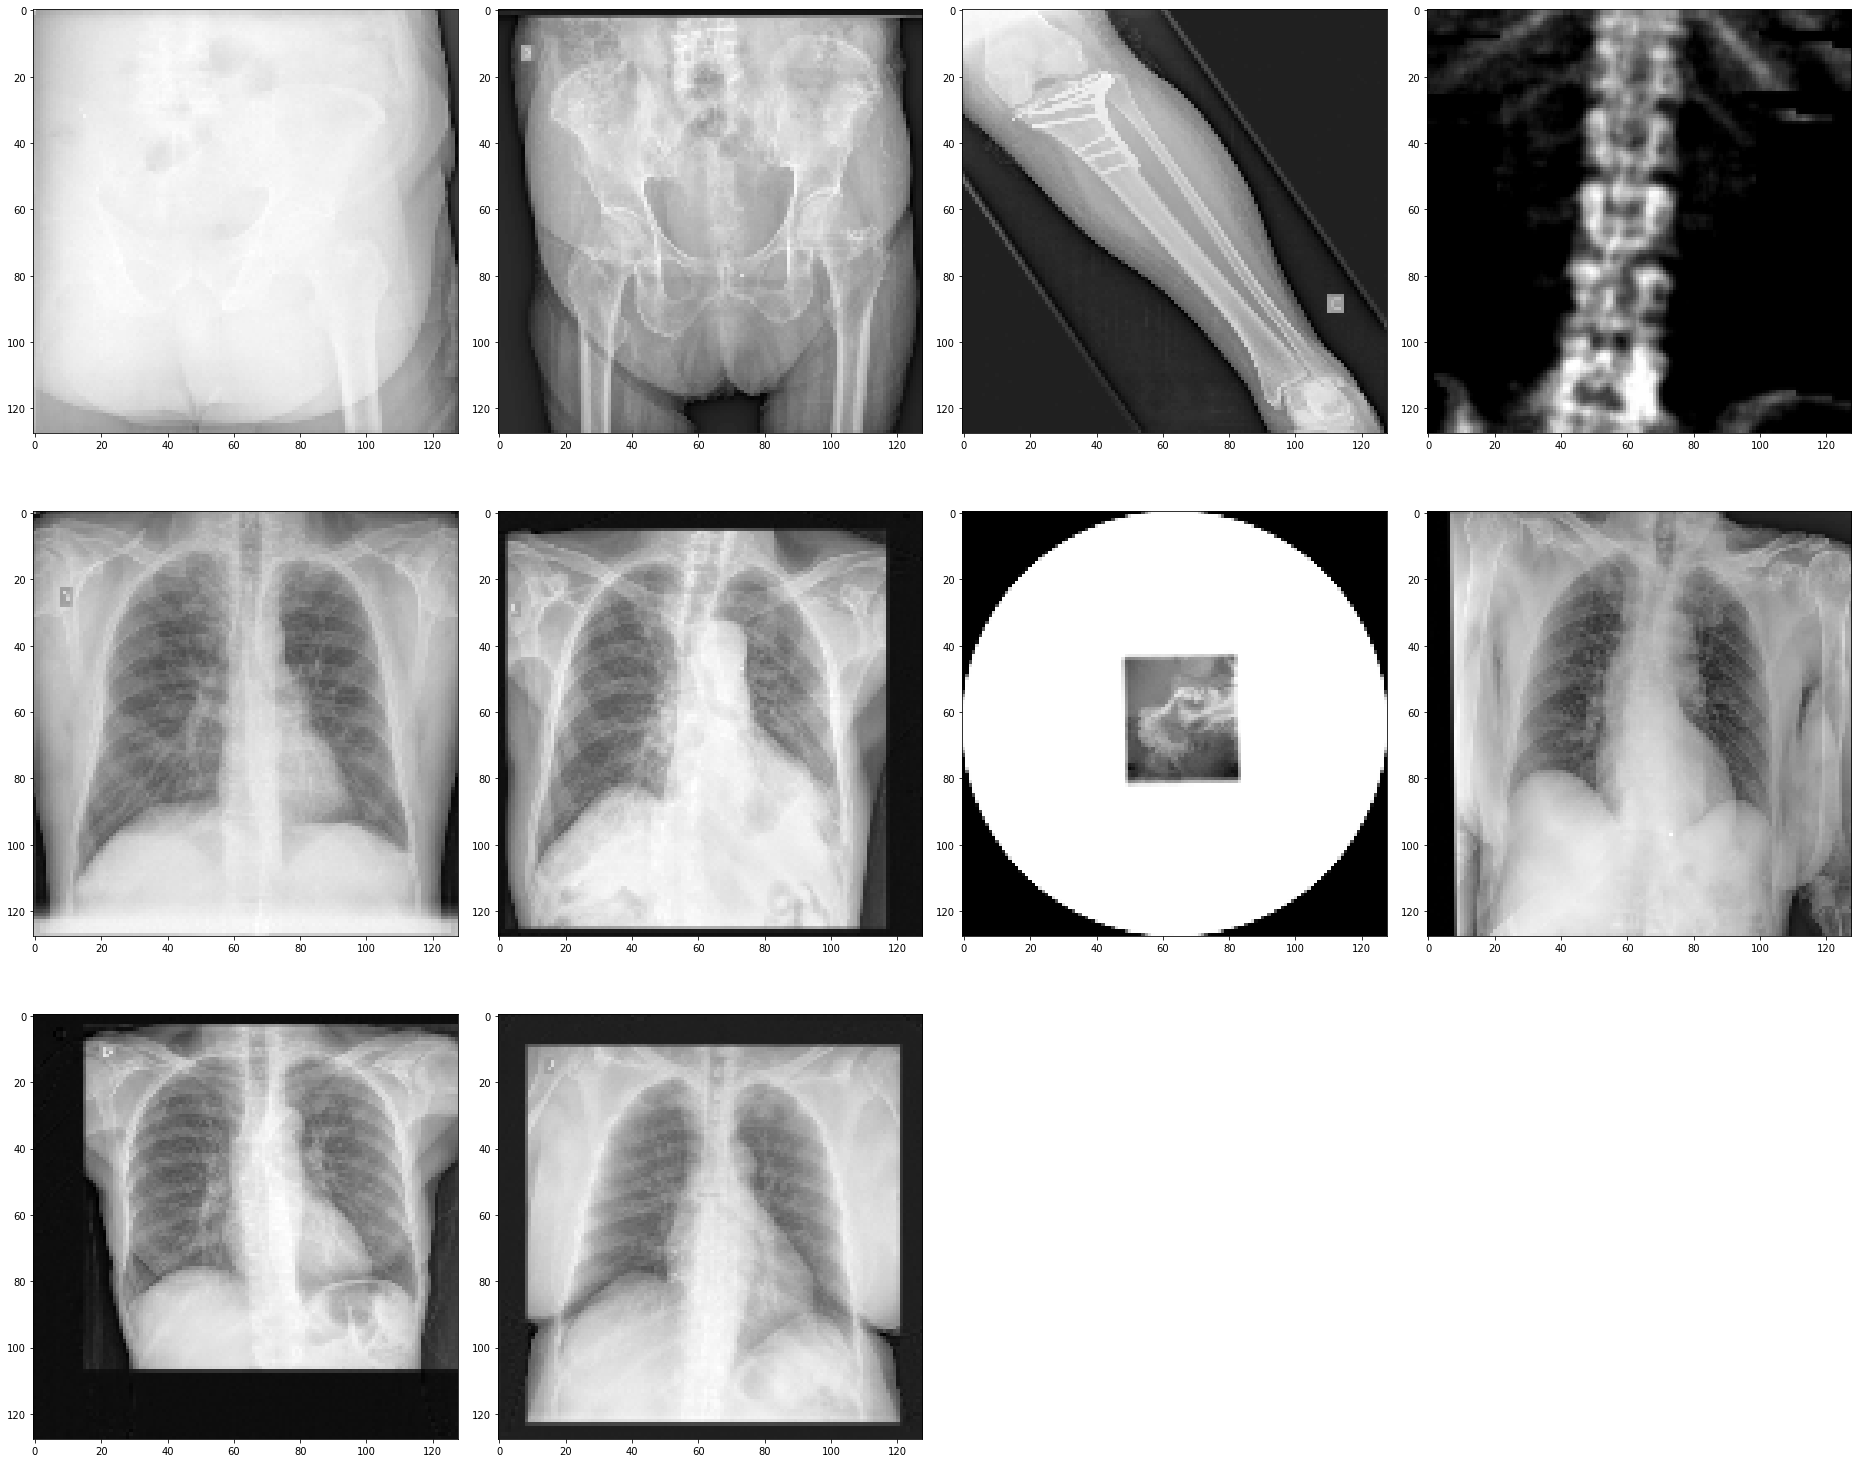

In [15]:
fig = plt.figure(figsize=(26,28))
for i in range(10):
    plt.subplot(4,4,i+1)
    plt.imshow(X[i],cmap='gray')
plt.tight_layout(pad=1.4)

[[[0.07664675]
  [0.08431373]
  [0.08431373]
  ...
  [0.08252911]
  [0.0839614 ]
  [0.08200061]]

 [[0.08129596]
  [0.08182445]
  [0.07647059]
  ...
  [0.07895987]
  [0.07609528]
  [0.08039216]]

 [[0.07823224]
  [0.07735141]
  [0.08107384]
  ...
  [0.07843138]
  [0.08235294]
  [0.07715227]]

 ...

 [[0.06970742]
  [0.08843444]
  [0.0821538 ]
  ...
  [0.08235294]
  [0.08019302]
  [0.07450981]]

 [[0.07202053]
  [0.08717831]
  [0.08288144]
  ...
  [0.09215686]
  [0.08325674]
  [0.07752758]]

 [[0.07611826]
  [0.08841146]
  [0.07825521]
  ...
  [0.07699908]
  [0.07825521]
  [0.08217678]]]


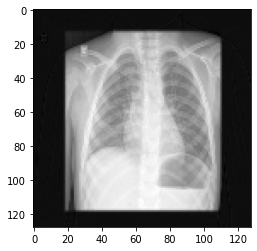

In [17]:
print(X[40])
plt.imshow(X[40],cmap='gray')

In [ ]:
y[0]

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.15)

# *CNN MODEL WITH MULTI LAYERS*

In [41]:
model = tf.keras.models.Sequential()
model.add(InputLayer(input_shape=(128,128,1)))
              
model.add(Conv2D(64,kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(Conv2D(128,kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Dropout(0.6))

model.add(Conv2D(256,kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(Conv2D(256,kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(512,kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(2048, activation="relu"))
model.add(Dense(22, activation="softmax"))

model.compile(optimizer='Adam', loss='BinaryCrossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 256)      

In [42]:
model.fit(x_train,y_train,batch_size=5,callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],epochs=40)

Epoch 1/40
261/261 [==============================] - 5s 15ms/step - loss: 0.1542 - accuracy: 0.4328
Epoch 2/40
261/261 [==============================] - 4s 15ms/step - loss: 0.0978 - accuracy: 0.5434
Epoch 3/40
261/261 [==============================] - 4s 15ms/step - loss: 0.0751 - accuracy: 0.6408
Epoch 4/40
261/261 [==============================] - 4s 15ms/step - loss: 0.0644 - accuracy: 0.6953
Epoch 5/40
261/261 [==============================] - 4s 16ms/step - loss: 0.0552 - accuracy: 0.7268
Epoch 6/40
261/261 [==============================] - 4s 15ms/step - loss: 0.0461 - accuracy: 0.7713
Epoch 7/40
261/261 [==============================] - 4s 15ms/step - loss: 0.0350 - accuracy: 0.8189
Epoch 8/40
261/261 [==============================] - 4s 15ms/step - loss: 0.0277 - accuracy: 0.8450
Epoch 9/40
261/261 [==============================] - 4s 15ms/step - loss: 0.0257 - accuracy: 0.8611
Epoch 10/40
261/261 [==============================] - 4s 15ms/step - loss: 0.0190 - accura

In [43]:
cnn_model.evaluate(x_test,y_test)

14/14 [==============================] - 0s 12ms/step - loss: 0.1817 - accuracy: 0.7103


[0.18172642588615417, 0.7103448510169983]

In [26]:
TEST_PATH = '../input/xraydataset/images/test/'
test_inp = []

In [27]:

for val in test_data.SOPInstanceUID:
    idd = val
    val = val + '-c.png'
    img = plt.imread(TEST_PATH + val)
    img = cv2.resize(img,dsize=(128,128))
    test_inp.append(np.expand_dims(img,axis=-1))

test_inp = np.array(test_inp)

In [28]:
pred = cnn_model.predict(test_inp)
pred.shape

(743, 22)

In [29]:
preds = []
for i in range(743):
    preds.append(np.argmax(pred[i]))

In [30]:
sub = pd.read_csv('../input/xraydataset/sample_submission.csv')
sub['SOPInstanceUID'] = test_data['SOPInstanceUID']
sub['Target'] = preds

In [31]:
sub.to_csv('my_submit.csv',index=False)

In [32]:
sb = pd.read_csv('./my_submit.csv')
sb

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.10001001190452685542...,20
1,1.2.826.0.1.3680043.8.498.10022667601042710442...,3
2,1.2.826.0.1.3680043.8.498.10024395388921105474...,9
3,1.2.826.0.1.3680043.8.498.10026689165626095651...,3
4,1.2.826.0.1.3680043.8.498.10035936364561920980...,3
...,...,...
738,1.2.826.0.1.3680043.8.498.98950979295424909746...,3
739,1.2.826.0.1.3680043.8.498.99120415799121180043...,3
740,1.2.826.0.1.3680043.8.498.99132008951330408682...,3
741,1.2.826.0.1.3680043.8.498.99611256581875030709...,21
